In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import datasets
import os
#import nxviz as nv
os.getcwd()

'C:\\Users\\sumith.singh\\A_SUBEX'

In [2]:
col_names = ['Node', 'Behavior', 'Node', 'Day', 'Flag', 'Nbrs', 'Num_Nbrs',
       'Nbrs_Dffsed', 'Num_Nbrs_Dffsd', 'high_nbrs', 'high_nbr_diff',
       'Deg_Ctrlty', 'Probability', 'ratio', 'tcudorp', 'knar', 'knar_norm']

In [3]:
df = pd.read_csv('df2B_Diff_Algo2_SKA.csv',header=0, names = col_names)

C:\Users\sumith.singh\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\io\parsers.py:709: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)
C:\Users\sumith.singh\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.sample(5)

,Node,Behavior,Node.1,Day,Flag,Nbrs,Num_Nbrs,Nbrs_Dffsed,Num_Nbrs_Dffsd,high_nbrs,high_nbr_diff,Deg_Ctrlty,Probability,ratio,tcudorp,knar,knar_norm
250233,250233,B,254771691421,100,Not Diffused,"['254771570640', '254770938395', '254772672995...",16,"['254772375946', '254775936875']",2,['254775833142'],[],1.321762e-05,0.818695,0.125,1.352650e-06,946734.0,0.978006
1158044,1158044,B,254771905856,100,Not Diffused,['254770893266'],1,[],0,['254770893266'],[],8.261015e-07,0.514391,0.000,0.000000e+00,369499.0,0.381704
824817,824817,B,254775440620,100,Not Diffused,"['254771059721', '254771297010']",2,[],0,['254771059721'],[],1.652203e-06,0.765527,0.000,0.000000e+00,369499.0,0.381704
1132530,1132530,B,254773700925,1,Diffused,['254772845815'],1,[],0,['254772845815'],[],8.261015e-07,0.910197,0.000,0.000000e+00,NaN,NaN
465461,465461,B,254775935875,100,Resistant,"['254776525308', '254772969881', '254776324583...",5,['254772969881'],1,['254777778888'],[],4.130508e-06,0.033997,0.200,2.808510e-08,NaN,NaN


In [5]:
df.columns

Index(['Node', 'Behavior', 'Node.1', 'Day', 'Flag', 'Nbrs', 'Num_Nbrs',
       'Nbrs_Dffsed', 'Num_Nbrs_Dffsd', 'high_nbrs', 'high_nbr_diff',
       'Deg_Ctrlty', 'Probability', 'ratio', 'tcudorp', 'knar', 'knar_norm'],
      dtype='object')

In [6]:
from collections import Counter
Counter(df['Flag'])

Counter({'Diffused': 121498, 'Not Diffused': 968025, 'Resistant': 120983})

In [7]:
df.dtypes

Node                int64
Behavior           object
Node.1             object
Day                 int64
Flag               object
Nbrs               object
Num_Nbrs            int64
Nbrs_Dffsed        object
Num_Nbrs_Dffsd      int64
high_nbrs          object
high_nbr_diff      object
Deg_Ctrlty        float64
Probability       float64
ratio             float64
tcudorp           float64
knar              float64
knar_norm         float64
dtype: object

In [25]:
dfLinR = df[['Day','Num_Nbrs','Num_Nbrs_Dffsd','Deg_Ctrlty','ratio','tcudorp']].copy()
dfLinR.sample(5)

,Day,Num_Nbrs,Num_Nbrs_Dffsd,Deg_Ctrlty,ratio,tcudorp
798537,100,3,1,2.478305e-06,0.333333,2.861331e-07
250950,100,1,0,8.261015e-07,0.000000,0.000000e+00
411675,100,2,1,1.652203e-06,0.500000,6.234962e-08
1061584,100,3,0,2.478305e-06,0.000000,0.000000e+00
297072,100,2,1,1.652203e-06,0.500000,2.326830e-07


In [26]:
dfLinR.columns

Index(['Day', 'Num_Nbrs', 'Num_Nbrs_Dffsd', 'Deg_Ctrlty', 'ratio', 'tcudorp'], dtype='object')

In [27]:
dfLinR.dtypes

Day                 int64
Num_Nbrs            int64
Num_Nbrs_Dffsd      int64
Deg_Ctrlty        float64
ratio             float64
tcudorp           float64
dtype: object

In [28]:
sns.pairplot(dfLinR)

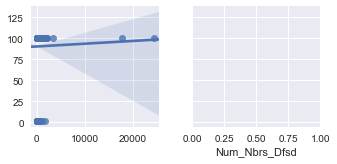

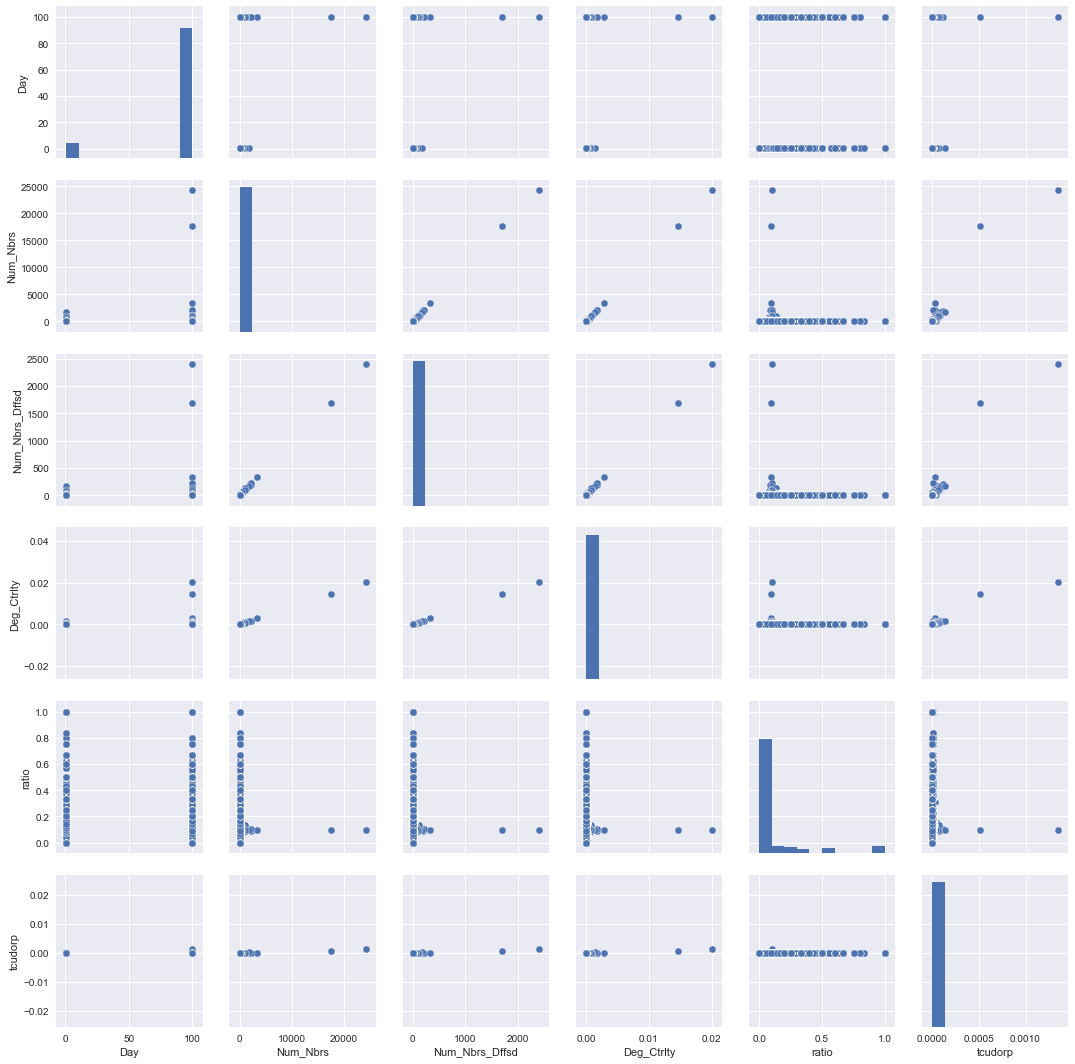

In [29]:
plt.show()

In [12]:
#Assign feature columns as list:feature_cols
feature_cols = ['Num_Nbrs','Num_Nbrs_Dffsd','Deg_Ctrlty','ratio','tcudorp']

# Assign to X  a subset of the data including only feature names
X = dfLinR[feature_cols]

In [13]:
#Assign to y the response variable as Pandas series
y = dfLinR['Day']

In [14]:
X.sample(5)

,Num_Nbrs,Num_Nbrs_Dffsd,Deg_Ctrlty,ratio,tcudorp
11465,18,4,1.486983e-05,0.222222,0.000001
247505,4,0,3.304406e-06,0.000000,0.000000
522696,1,0,8.261015e-07,0.000000,0.000000
1034935,1,0,8.261015e-07,0.000000,0.000000
1010598,1,0,8.261015e-07,0.000000,0.000000


In [17]:
y[10]

1

In [30]:
# Import SK Learn train test split
from sklearn.cross_validation import train_test_split
# Assign variables to capture train test split output 
X_train, X_test, y_train, y_test = train_test_split(X,y)

C:\Users\sumith.singh\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [31]:
# Import SK Lean Linear Regression
from sklearn.linear_model import LinearRegression

# Instantiate
linreg = LinearRegression()

# Fit model to trai data i.e. Learn Coefficients
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
# Prints y-intercept
print(linreg.intercept_)

# Prints the beta coefficient in the same order as passed
print(linreg.coef_)

# Zip and pair feature names and coefficients together
zip(feature_cols, linreg.coef_)

90.40146874521179
[-1.59378230e+00  5.94125594e+00  1.81795486e+06 -4.24670365e-01
 -1.35366907e+07]


In [33]:
y_pred = linreg.predict(X_test)

In [35]:
# Import metrics library
from sklearn import metrics

#Print result of MAE
print(metrics.mean_absolute_error(y_test,y_pred))

#Print result for MSE
print(metrics.mean_squared_error(y_test,y_pred))

#Print result for RMSE
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

17.577579204612096
991.966386425372
31.495497875495982
